In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Load the datasets

In [ ]:
fies_2021_path = "/content/drive/MyDrive/ML Mini-project Dataset/2021_FIES.csv"
df_21 = pd.read_csv(fies_2021_path)

In [ ]:
fies_2018_path = "/content/drive/MyDrive/ML Mini-project Dataset/2018_FIES.csv"
df_18 = pd.read_csv(fies_2018_path)

In [ ]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165029 entries, 0 to 165028
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        165029 non-null  int64  
 1   W_PROV                        165029 non-null  int64  
 2   SEQUENCE_NO                   165029 non-null  int64  
 3   FSIZE                         165029 non-null  float64
 4   REG_SAL                       165029 non-null  int64  
 5   SEASON_SAL                    165029 non-null  int64  
 6   WAGES                         165029 non-null  int64  
 7   NETSHARE                      165029 non-null  int64  
 8   CASH_ABROAD                   165029 non-null  int64  
 9   CASH_DOMESTIC                 165029 non-null  int64  
 10  RENTALS_REC                   165029 non-null  int64  
 11  INTEREST                      165029 non-null  int64  
 12  PENSION                       165029 non-nul

In [ ]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147717 entries, 0 to 147716
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Region                                                 147717 non-null  int64  
 1   Province                                               147717 non-null  int64  
 2   sequence no.                                           147717 non-null  int64  
 3   Urban/Rural                                            147717 non-null  int64  
 4   Final Weight                                           147717 non-null  float64
 5   Income Decile                                          147717 non-null  int64  
 6   Per Capita Income Decile                               147717 non-null  int64  
 7   Food Threshold                                         147717 non-null  int64  
 8   Poverty Threshold                 

# Preparing the dataset

## Check for missing data

In [ ]:
missing_data = df_21.isnull()

# Run for loop to check for missing values
for column in missing_data.columns.values.tolist():
    print(f"{column}\t{missing_data[column].value_counts()}")
    print("")

W_REGN	False    165029
Name: W_REGN, dtype: int64

W_PROV	False    165029
Name: W_PROV, dtype: int64

SEQUENCE_NO	False    165029
Name: SEQUENCE_NO, dtype: int64

FSIZE	False    165029
Name: FSIZE, dtype: int64

REG_SAL	False    165029
Name: REG_SAL, dtype: int64

SEASON_SAL	False    165029
Name: SEASON_SAL, dtype: int64

WAGES	False    165029
Name: WAGES, dtype: int64

NETSHARE	False    165029
Name: NETSHARE, dtype: int64

CASH_ABROAD	False    165029
Name: CASH_ABROAD, dtype: int64

CASH_DOMESTIC	False    165029
Name: CASH_DOMESTIC, dtype: int64

RENTALS_REC	False    165029
Name: RENTALS_REC, dtype: int64

INTEREST	False    165029
Name: INTEREST, dtype: int64

PENSION	False    165029
Name: PENSION, dtype: int64

DIVIDENDS	False    165029
Name: DIVIDENDS, dtype: int64

OTHER_SOURCE	False    165029
Name: OTHER_SOURCE, dtype: int64

NET_RECEIPT	False    165029
Name: NET_RECEIPT, dtype: int64

REGFT	False    165029
Name: REGFT, dtype: int64

NET_CFG	False    165029
Name: NET_CFG, dtype: i

In [ ]:
missing_data = df_18.isnull()

# Run for loop to check for missing values
for column in missing_data.columns.values.tolist():
    print(f"{column}\t{missing_data[column].value_counts()}")
    print("")

Region	False    147717
Name: Region, dtype: int64

Province	False    147717
Name: Province, dtype: int64

sequence no.	False    147717
Name: sequence no., dtype: int64

Urban/Rural	False    147717
Name: Urban/Rural, dtype: int64

Final Weight	False    147717
Name: Final Weight, dtype: int64

Income Decile	False    147717
Name: Income Decile, dtype: int64

Per Capita Income Decile	False    147717
Name: Per Capita Income Decile, dtype: int64

Food Threshold	False    147717
Name: Food Threshold, dtype: int64

Poverty Threshold	False    147717
Name: Poverty Threshold, dtype: int64

Regional Per Capita Income Decile	False    147717
Name: Regional Per Capita Income Decile, dtype: int64

Urban Poverty Line	True    147717
Name: Urban Poverty Line, dtype: int64

Ruran Poverty Line	True    147717
Name: Ruran Poverty Line, dtype: int64

Family SIze	False    147717
Name: Family SIze, dtype: int64

Per Capita Income	False    147717
Name: Per Capita Income, dtype: int64

Total Food Consumed at Home 

## Classifying total income based on avg total income of dataset

- used the median value for the average of the total income due to the presence of outliers in the data

### 2021 FIES

In [ ]:
# add another column named 'income_status' containing values 1 and 0 where 1 is when the total income is above the median value, and 0 if it is below or equal to the median value.
  
df_21['income_status'] = np.where(df_21['TOINC'] > df_21['TOINC'].median(), 1, 0)
df_21.head()

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,RPROV,RPSU,BWEIGHT,RFACT,RFACT_POP,PCINC,NPCINC,RPCINC,PPCINC,income_status
0,1,28,1,6.5,290000,0,290000,0,0,340000,...,2800,217,100.768,103.1817,106.2332,107683.08,8.0,8.0,7.0,1
1,1,28,2,4.0,80000,72000,152000,20500,60000,32500,...,2800,217,100.768,103.1817,106.2332,81202.50,7.0,7.0,6.0,1
2,1,28,3,1.0,0,0,0,0,30000,81000,...,2800,217,100.768,103.1817,106.2332,190061.00,10.0,10.0,9.0,0
3,1,28,4,3.0,0,0,0,8700,170000,0,...,2800,217,100.768,103.1817,106.2332,71235.00,7.0,7.0,5.0,1
4,1,28,5,4.0,12000,80400,92400,250,30000,0,...,2800,217,100.768,103.1817,106.2332,68072.50,6.0,6.0,4.0,1


In [ ]:
df_21['income_category'] = "Below/Equal Ave. Total Income"
df_21.loc[df_21['income_status'] == 1, 'income_category'] = "Above Ave. Total Income"

### 2018 FIES

In [ ]:
# add another column named 'income_status' containing values 1 and 0 where 1 is when the total income is above the median value, and 0 if it is below or equal to the median value.
  
df_18['income_status'] = np.where(df_18['Total Income'] > df_18['Total Income'].median(), 1, 0)
df_18.head()

,Region,Province,sequence no.,Urban/Rural,Final Weight,Income Decile,Per Capita Income Decile,Food Threshold,Poverty Threshold,Regional Per Capita Income Decile,...,Major Grouping of Main Source of Income,Detailed Grouping of Main Source of income,Agricultural Household indicator,Stratum (Original),Psu (Original),Stratum (Recode),Psu (Recode),Province (Recode),Agri Income / Total Income,income_status
0,1,28,1,2,97.7504,7,10,0,0,10,...,85,55,0,3152,NaN,NaN,NaN,71,28.0,1
1,1,28,2,2,97.7504,3,2,0,1,1,...,62,96,0,1012,NaN,NaN,NaN,71,28.0,0
2,1,28,3,2,97.7504,4,5,0,0,5,...,79,31,0,1022,NaN,NaN,NaN,71,28.0,0
3,1,28,4,2,97.7504,10,10,0,0,10,...,36,38,0,3152,NaN,NaN,NaN,71,28.0,1
4,1,28,5,2,97.7504,6,8,0,0,8,...,89,6,0,1022,NaN,NaN,NaN,71,28.0,1


In [ ]:
df_18['income_category'] = "Below/Equal Ave. Total Income"
df_18.loc[df_18['income_status'] == 1, 'income_category'] = "Above Ave. Total Income"

## Summary statistics for 2021 data


In [ ]:
summary_21 = df_21.describe(include = 'all')
summary_21

,W_REGN,W_PROV,SEQUENCE_NO,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,...,URB,RPROV,RPSU,BWEIGHT,RFACT,RFACT_POP,PCINC,NPCINC,RPCINC,PPCINC
count,165029.000000,165029.000000,165029.000000,165029.000000,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05,1.650290e+05,...,165029.000000,165029.000000,165029.000000,165029.000000,165029.000000,165029.000000,1.650290e+05,165029.000000,165029.000000,165029.000000
mean,9.273200,45.657212,82515.000000,4.244409,1.253006e+05,2.510955e+04,1.504101e+05,1.808755e+03,2.001754e+04,1.671844e+04,...,1.520072,4568.173703,386.174781,139.465050,159.956529,157.993903,8.185092e+04,5.290725,5.531791,5.491483
std,4.701484,24.885794,47639.913124,2.029229,2.053604e+05,4.793015e+04,2.074431e+05,1.488686e+04,7.752000e+04,3.150117e+04,...,0.499598,2488.661688,448.857771,137.526097,153.629657,149.124832,1.010066e+05,2.897115,2.881691,2.871011
min,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,100.000000,1.000000,4.333000,4.863000,5.297600,5.408625e+03,1.000000,1.000000,1.000000
25%,5.000000,24.000000,41258.000000,3.000000,0.000000e+00,0.000000e+00,2.160000e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,2402.000000,102.000000,54.716000,65.901200,65.395900,3.540300e+04,3.000000,3.000000,3.000000
50%,10.000000,45.000000,82515.000000,4.000000,5.600000e+04,0.000000e+00,9.300000e+04,0.000000e+00,0.000000e+00,8.000000e+03,...,2.000000,4501.000000,239.000000,93.000000,110.720700,109.514900,5.543200e+04,5.000000,6.000000,5.000000
75%,13.000000,70.000000,123772.000000,5.500000,1.654000e+05,3.600000e+04,1.919000e+05,0.000000e+00,2.000000e+03,2.160000e+04,...,2.000000,7000.000000,478.000000,164.136000,186.286800,186.521900,9.400000e+04,8.000000,8.000000,8.000000
max,17.000000,98.000000,165029.000000,23.000000,6.821000e+06,4.290000e+06,6.821000e+06,3.901650e+06,5.130000e+06,3.000000e+06,...,2.000000,9804.000000,3086.000000,3260.250000,3950.610000,4029.511900,9.691285e+06,10.000000,10.000000,10.000000


## Summary statistics for 2018 data

In [ ]:
summary_18 = df_18.describe(include = 'all')
summary_18

,Region,Province,sequence no.,Urban/Rural,Final Weight,Income Decile,Per Capita Income Decile,Food Threshold,Poverty Threshold,Regional Per Capita Income Decile,...,Total Income from Non-agricultural sources/activities,Major Grouping of Main Source of Income,Detailed Grouping of Main Source of income,Agricultural Household indicator,Stratum (Original),Psu (Original),Stratum (Recode),Psu (Recode),Province (Recode),Agri Income / Total Income
count,147717.000000,147717.000000,147717.000000,147717.000000,147717.000000,147717.000000,147717.000000,147717.000000,147717.000000,147717.000000,...,1.477170e+05,147717.000000,147717.000000,147717.0,147717.000000,0.0,0.0,0.0,147717.000000,147717.000000
mean,9.227888,45.169696,73859.000000,1.552272,167.530981,5.185544,5.178889,0.043685,0.145975,5.501202,...,2.915080e+08,49.600357,43.883378,0.0,1779.089563,NaN,NaN,NaN,387.472661,45.183679
std,4.731493,24.829571,42642.369194,0.497262,160.912258,2.880420,2.901226,0.204394,0.353082,2.876554,...,3.119619e+08,28.865983,30.620371,0.0,892.040661,NaN,NaN,NaN,445.501049,24.826954
min,1.000000,1.000000,1.000000,1.000000,4.567600,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,0.0,1011.000000,NaN,NaN,NaN,1.000000,1.000000
25%,5.000000,24.000000,36930.000000,1.000000,71.229500,3.000000,3.000000,0.000000,0.000000,3.000000,...,6.400000e+01,25.000000,16.000000,0.0,1022.000000,NaN,NaN,NaN,104.000000,24.000000
50%,10.000000,45.000000,73859.000000,2.000000,113.324700,5.000000,5.000000,0.000000,0.000000,6.000000,...,1.776000e+08,50.000000,44.000000,0.0,1022.000000,NaN,NaN,NaN,241.000000,45.000000
75%,13.000000,69.000000,110788.000000,2.000000,198.455900,8.000000,8.000000,0.000000,0.000000,8.000000,...,5.339000e+08,74.000000,70.000000,0.0,2132.000000,NaN,NaN,NaN,482.000000,69.000000
max,17.000000,98.000000,147717.000000,2.000000,6242.720900,10.000000,10.000000,1.000000,1.000000,10.000000,...,9.999000e+08,99.000000,99.000000,0.0,3242.000000,NaN,NaN,NaN,3062.000000,98.000000


# 2021 Dataset Exploratory Data Analysis

### Total Income

In [ ]:
first_quartile = df_21["TOINC"].quantile(0.25)
median = df_21["TOINC"].median()
mean = summary_21.loc["mean","TOINC"]
third_quartile = df_21["TOINC"].quantile(0.75)
min = df_21["TOINC"].min()
max = df_21["TOINC"].max()


print(f"First Quartile: {first_quartile}")
print(f"Third Quartile: {third_quartile}")
print(f"Median: {median}")
print(f"Mean: {mean}")
print(f"Min: {min}")
print(f"Max: {max}")

First Quartile: 138682.0
Third Quartile: 342195.0
Median: 210200.0
Mean: 296030.55212114233
Min: 10374
Max: 16838680


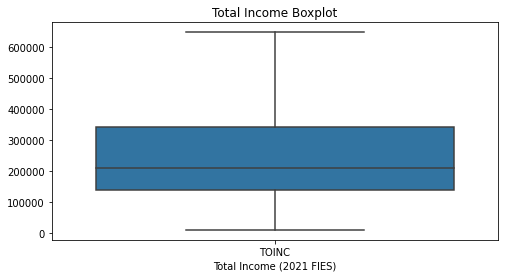

In [ ]:
# Plot the data distribution of total income in 2021 dataset using a boxplot

plt.figure(figsize=(8,4))
sns.boxplot(data=df_21[["TOINC"]],showfliers=False)
plt.title("Total Income Boxplot")
plt.xlabel("Total Income (2021 FIES)")
plt.show()

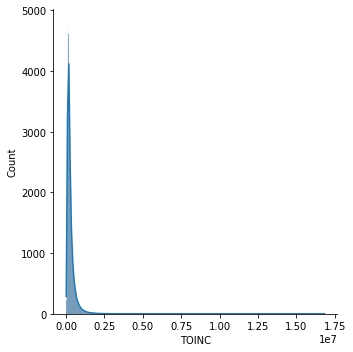

In [ ]:
# check skewness of data
sns.displot(df_21['TOINC'], kde=True)

### Total Expenditure

In [ ]:
first_quartile = df_21["TOTEX"].quantile(0.25)
median = df_21["TOTEX"].median()
mean = summary_21.loc["mean","TOTEX"]
third_quartile = df_21["TOTEX"].quantile(0.75)
min = df_21["TOTEX"].min()
max = df_21["TOTEX"].max()


print(f"First Quartile: {first_quartile}")
print(f"Third Quartile: {third_quartile}")
print(f"Median: {median}")
print(f"Mean: {mean}")
print(f"Min: {min}")
print(f"Max: {max}")

First Quartile: 111385.0
Third Quartile: 262118.0
Median: 167384.0
Mean: 218001.98309994
Min: 8794
Max: 7641695


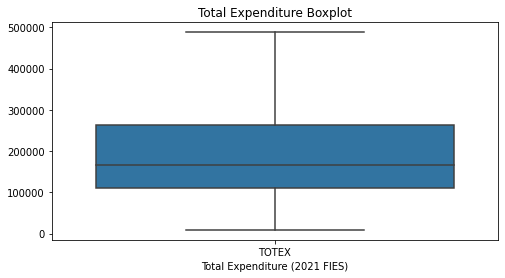

In [ ]:
# Plot the data distribution of total expenditure in 2021 dataset using a boxplot

plt.figure(figsize=(8,4))
sns.boxplot(data=df_21[["TOTEX"]],showfliers=False)
plt.title("Total Expenditure Boxplot")
plt.xlabel("Total Expenditure (2021 FIES)")
plt.show()

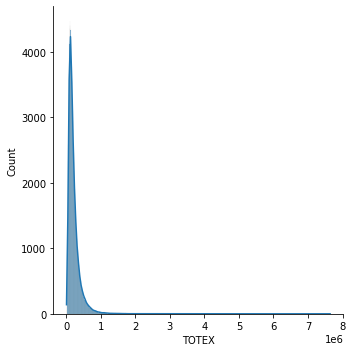

In [ ]:
# check skewness of data
sns.displot(df_21['TOTEX'], kde=True)

# 2018 Dataset Exploratory Data Analysis

### Total Income

In [ ]:
first_quartile = df_18["Total Income"].quantile(0.25)
median = df_18["Total Income"].median()
mean = summary_18.loc["mean","Total Income"]
third_quartile = df_18["Total Income"].quantile(0.75)
min = df_18["Total Income"].min()
max = df_18["Total Income"].max()


print(f"First Quartile: {first_quartile}")
print(f"Third Quartile: {third_quartile}")
print(f"Median: {median}")
print(f"Mean: {mean}")
print(f"Min: {min}")
print(f"Max: {max}")

First Quartile: 13.0
Third Quartile: 34.0
Median: 20.0
Mean: 7374.045160678866
Min: 1
Max: 400000032


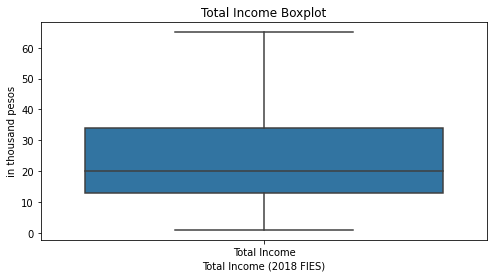

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_18[["Total Income"]], showfliers = False)
plt.title("Total Income Boxplot")
plt.xlabel("Total Income (2018 FIES)")
plt.ylabel("in thousand pesos")
plt.show()

Note: Outliers were not included the chart because including them made the box plot too small.

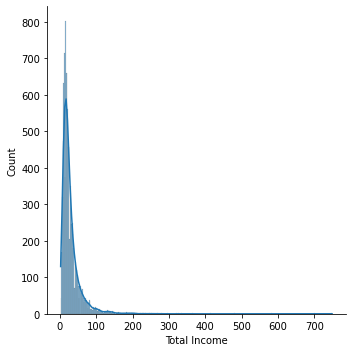

In [ ]:
# check skewness of data
sns.displot(df_18['Total Income'].head(10000),kde=True)

skewness for 2018 FIES was checked using 10000 rows only because the notebook keeps crashing if all observations are used. 10000 was arbitrarily chosen.

### Total Expenditure

In [ ]:
first_quartile = df_18["Total Expenditure"].quantile(0.25)
median = df_18["Total Expenditure"].median()
mean = summary_18.loc["mean","Total Expenditure"]
third_quartile = df_18["Total Expenditure"].quantile(0.75)
min = df_18["Total Expenditure"].min()
max = df_18["Total Expenditure"].max()


print(f"First Quartile: {first_quartile}")
print(f"Third Quartile: {third_quartile}")
print(f"Median: {median}")
print(f"Mean: {mean}")
print(f"Min: {min}")
print(f"Max: {max}")

First Quartile: 38.0
Third Quartile: 27940000013.0
Median: 7800000006.0
Mean: 18469557215.2566
Min: 1
Max: 99990000022


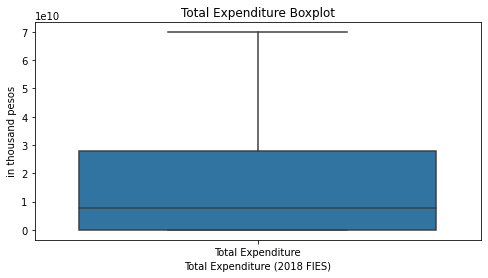

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_18[["Total Expenditure"]], showfliers = False)
plt.title("Total Expenditure Boxplot")
plt.xlabel("Total Expenditure (2018 FIES)")
plt.ylabel("in thousand pesos")
plt.show()

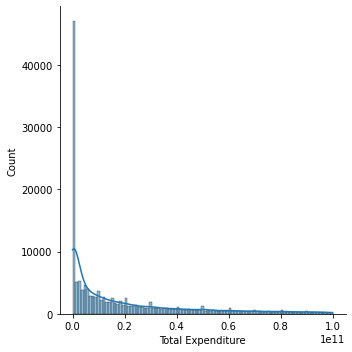

In [ ]:
# check skewness of data
sns.displot(df_18['Total Expenditure'],kde=True)

## Correlation Matrix of 2021 dataset

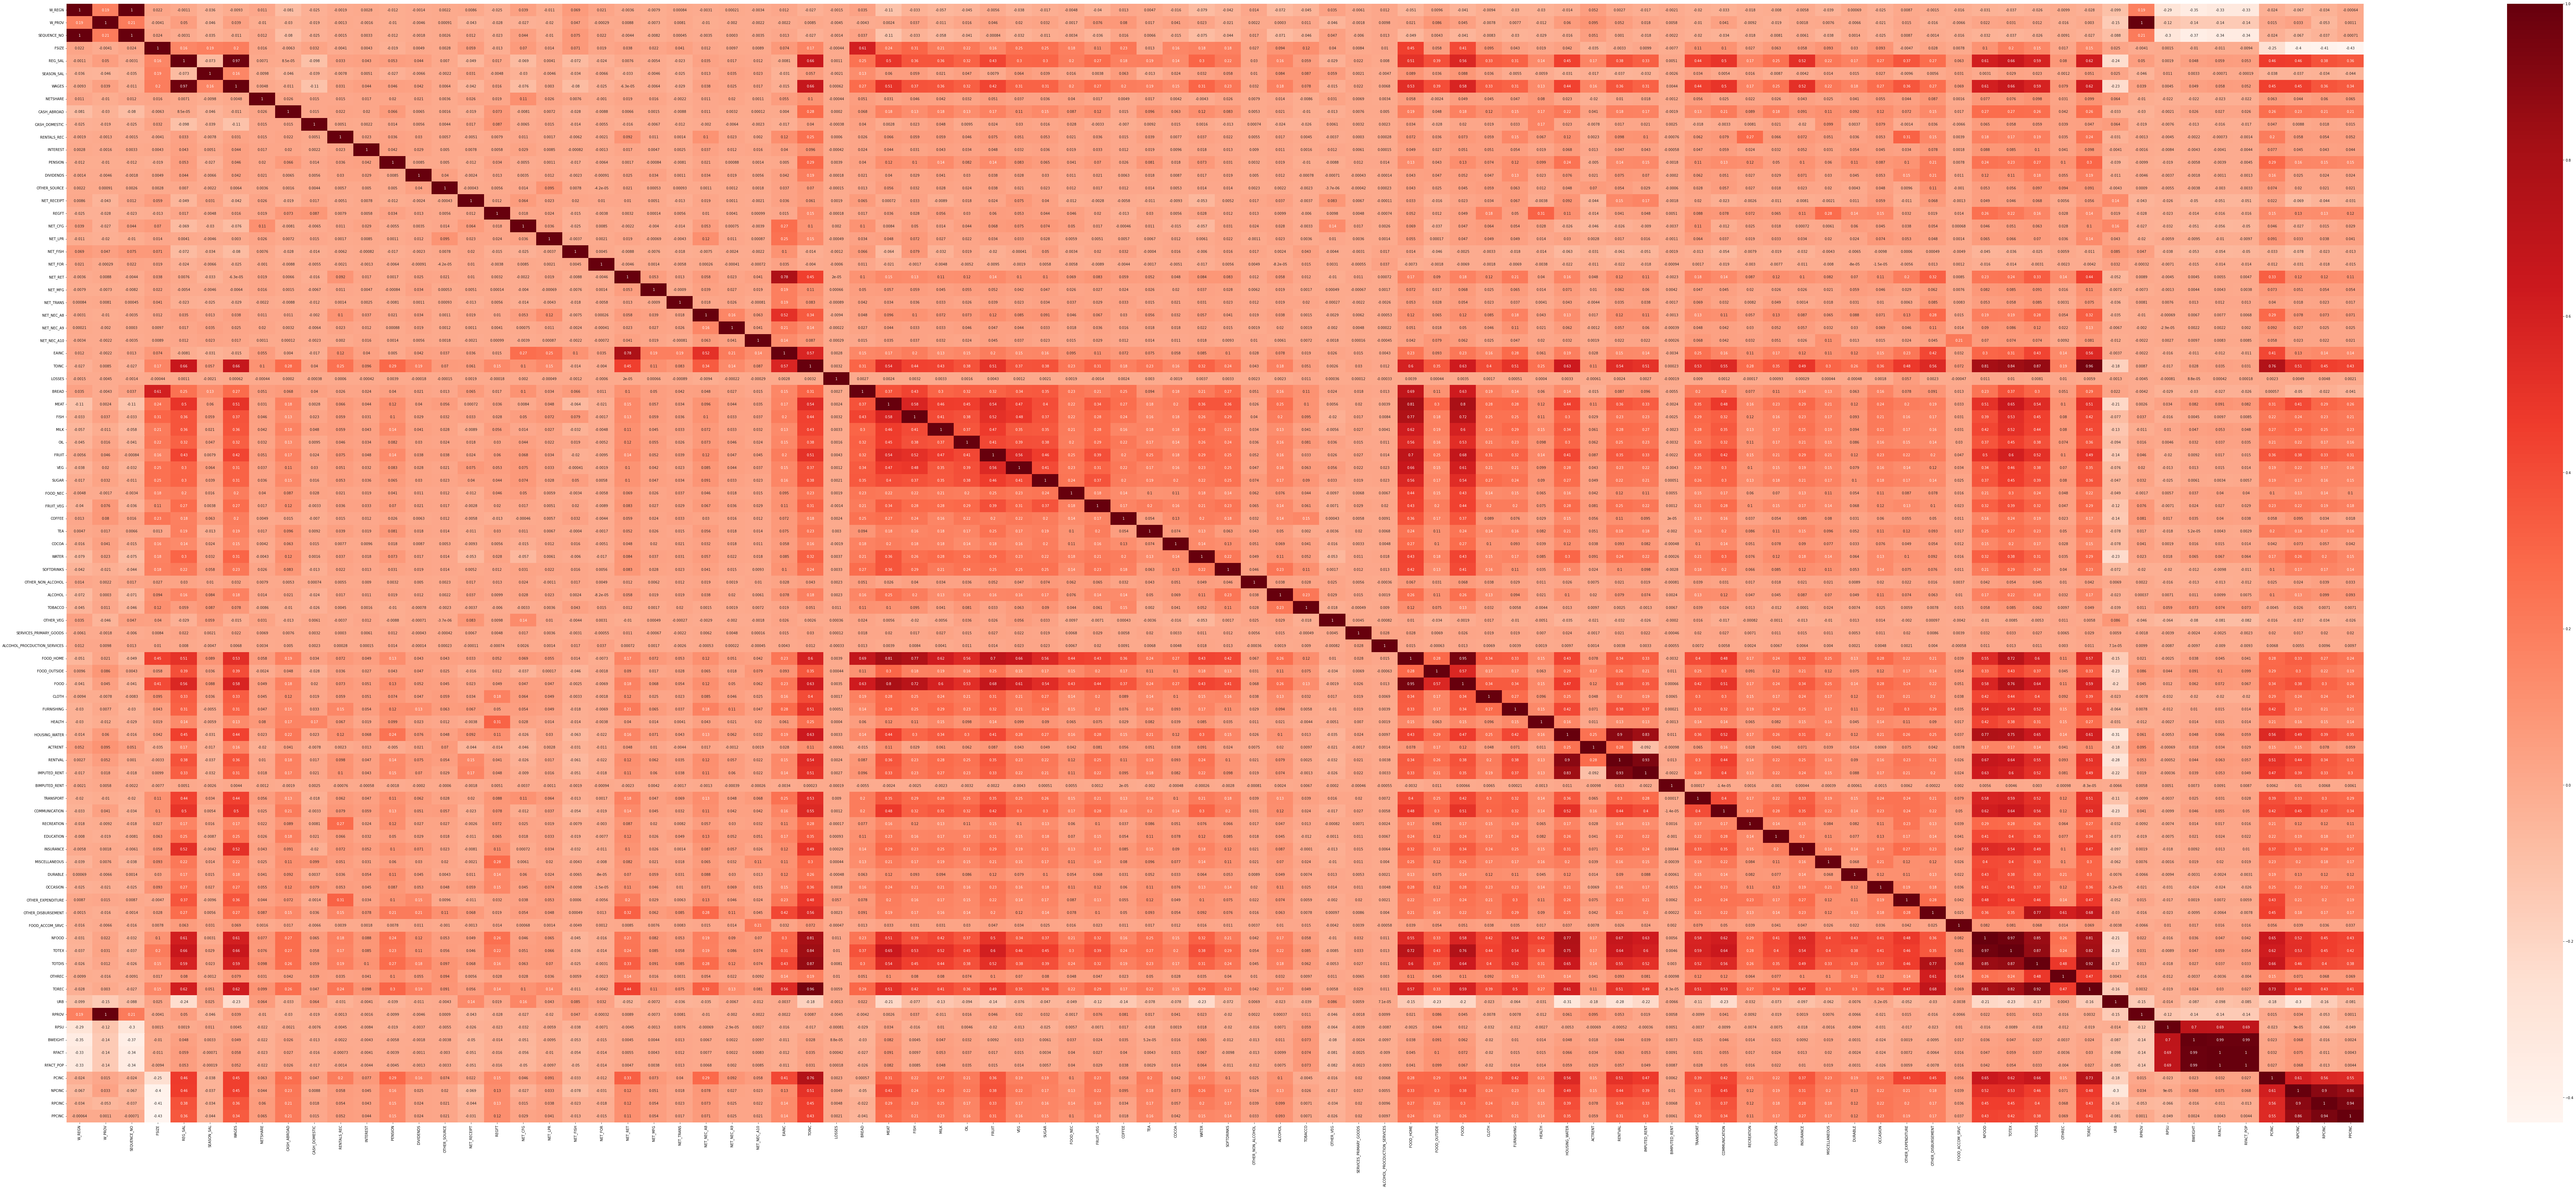

In [ ]:
corr_matrix_21 = df_21.corr()
plt.figure(figsize=(150,60))
sns.heatmap(corr_matrix_21, annot=True, cmap="Reds")
plt.show()

# Trend Comparison on 2018 vs 2021 dataset

## Normalizing FIES 2018 and 2021, Total Expenditure and Total Income data

In [ ]:
exp_inc_18 = df_18[["Total Expenditure","Total Income"]]
x = exp_inc_18.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_exp_inc18 = pd.DataFrame(x_scaled, columns = ["Total Expenditure","Total Income"])

In [ ]:
exp_inc_21 = df_21[["TOTEX","TOINC"]]
x = exp_inc_21.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_exp_inc21 = pd.DataFrame(x_scaled, columns = ["Total Expenditure","Total Income"])

## Histogram - Number of observations with below average total income and observations with above average total income

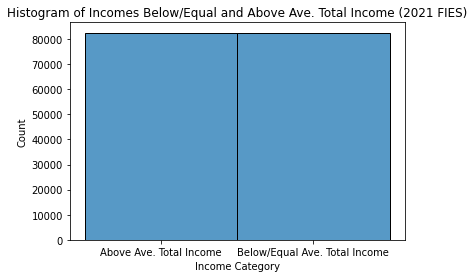

In [ ]:
sns.histplot(data=df_21, x="income_category")
plt.title("Histogram of Incomes Below/Equal and Above Ave. Total Income (2021 FIES)")
plt.xlabel("Income Category")
plt.show()

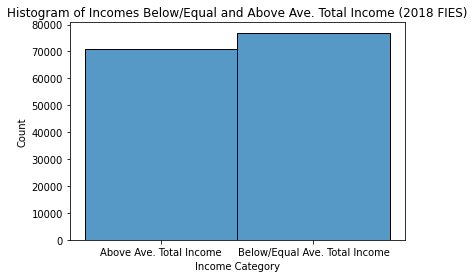

In [ ]:
sns.histplot(data=df_18, x="income_category")
plt.title("Histogram of Incomes Below/Equal and Above Ave. Total Income (2018 FIES)")
plt.xlabel("Income Category")
plt.show()

## Barplot - Total Expenditure by Income Category

In [ ]:
normalized_exp_inc18["income_category"] = df_18["income_category"]
normalized_exp_inc21["income_category"] = df_21["income_category"]

### FIES 2021 - Average Total Expenditure, grouped according to income status(0 - below average total income, 1 - above average total income)


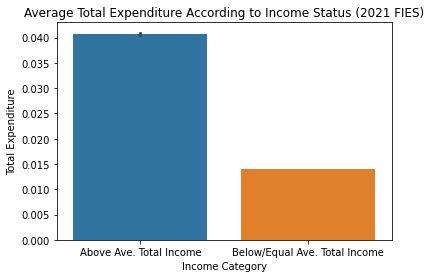

In [ ]:
sns.barplot(data=normalized_exp_inc21, x="income_category", y="Total Expenditure")
plt.title("Average Total Expenditure According to Income Status (2021 FIES)")
plt.ylabel("Total Expenditure")
plt.xlabel("Income Category")
plt.show()

### FIES 2018 - Average Total Expenditure, grouped according to income status(0 - below average total income, 1 - above average total income)


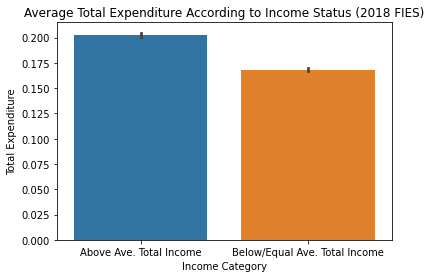

In [ ]:
sns.barplot(data=normalized_exp_inc18, x="income_category", y="Total Expenditure")
plt.title("Average Total Expenditure According to Income Status (2018 FIES)")
plt.ylabel("Total Expenditure")
plt.xlabel("Income Category")
plt.show()

## Bar Plot - Total Food Expenditure vs Total Non Food Expenditure by Income Category

### FIES 2021 - Total Food Expenditure vs Total Non Food Expenditure grouped by income_status



In [ ]:
exp_types_21 = df_21[["FOOD","NFOOD"]]
# Normalization
x = exp_types_21.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_exp_21 = pd.DataFrame(x_scaled, columns = ["FOOD","NON-FOOD"])
scaled_exp_21['income_category'] = df_21['income_category']
scaled_exp_21.head()

,FOOD,NON-FOOD,income_category
0,0.089611,0.025036,Above Ave. Total Income
1,0.054151,0.017839,Above Ave. Total Income
2,0.025482,0.013724,Below/Equal Ave. Total Income
3,0.037020,0.011200,Above Ave. Total Income
4,0.043507,0.020657,Above Ave. Total Income


In [ ]:
# melting normalized data for barplot representation
melted_exp_21 = scaled_exp_21.melt('income_category', var_name='expenditure_type', value_name='amount')
melted_exp_21

,income_category,expenditure_type,amount
0,Above Ave. Total Income,FOOD,0.089611
1,Above Ave. Total Income,FOOD,0.054151
2,Below/Equal Ave. Total Income,FOOD,0.025482
3,Above Ave. Total Income,FOOD,0.037020
4,Above Ave. Total Income,FOOD,0.043507
...,...,...,...
330053,Below/Equal Ave. Total Income,NON-FOOD,0.002252
330054,Below/Equal Ave. Total Income,NON-FOOD,0.007651
330055,Below/Equal Ave. Total Income,NON-FOOD,0.010098
330056,Below/Equal Ave. Total Income,NON-FOOD,0.005492


<function matplotlib.pyplot.show(*args, **kw)>

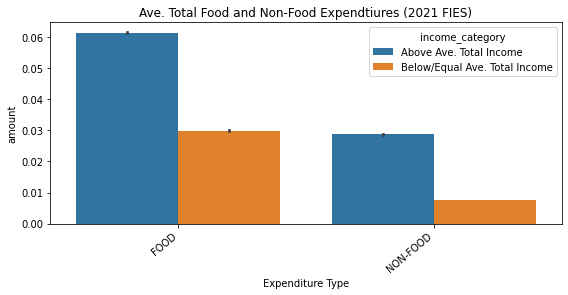

In [ ]:
plt.figure(figsize=(8,4))

ax = sns.barplot(data=melted_exp_21, x="expenditure_type", y="amount", hue="income_category")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.title("Ave. Total Food and Non-Food Expendtiures (2021 FIES)")
plt.xlabel("Expenditure Type")

plt.show

### FIES 2018 - Total Food Expenditure vs Total Non Food Expenditure grouped by income_status


In [ ]:
exp_types_18 = df_18[["Total Food Expenditure","Total Non-Food Expenditure"]]
# Normalization
x = exp_types_18.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_exp_18 = pd.DataFrame(x_scaled, columns = ["FOOD","NON-FOOD"])
scaled_exp_18['income_category'] = df_18['income_category']
scaled_exp_18.head()

,FOOD,NON-FOOD,income_category
0,1.201201e-01,0.211184,Above Ave. Total Income
1,9.009009e-11,0.064626,Below/Equal Ave. Total Income
2,6.006006e-11,0.199180,Below/Equal Ave. Total Income
3,1.101101e-10,0.273910,Above Ave. Total Income
4,9.009009e-11,0.110044,Above Ave. Total Income


In [ ]:
melted_exp_18 = scaled_exp_18.melt('income_category', var_name='expenditure_type', value_name='amount')
melted_exp_18

,income_category,expenditure_type,amount
0,Above Ave. Total Income,FOOD,1.201201e-01
1,Below/Equal Ave. Total Income,FOOD,9.009009e-11
2,Below/Equal Ave. Total Income,FOOD,6.006006e-11
3,Above Ave. Total Income,FOOD,1.101101e-10
4,Above Ave. Total Income,FOOD,9.009009e-11
...,...,...,...
295429,Above Ave. Total Income,NON-FOOD,5.232094e-02
295430,Below/Equal Ave. Total Income,NON-FOOD,1.000401e-02
295431,Above Ave. Total Income,NON-FOOD,7.503004e-02
295432,Below/Equal Ave. Total Income,NON-FOOD,1.545618e-01


<function matplotlib.pyplot.show(*args, **kw)>

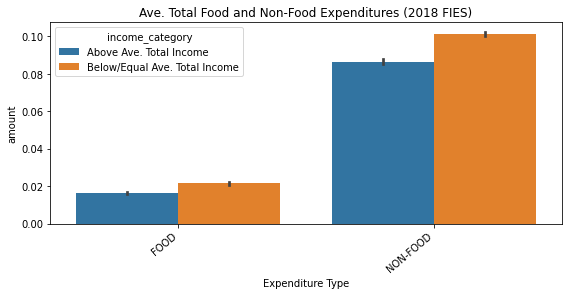

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=melted_exp_18, x="expenditure_type", y="amount", hue="income_category")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.title("Ave. Total Food and Non-Food Expenditures (2018 FIES)")
plt.xlabel("Expenditure Type")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

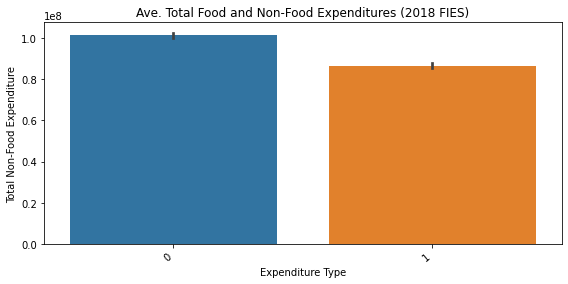

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df_18, x="income_status", y="Total Non-Food Expenditure")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.title("Ave. Total Food and Non-Food Expenditures (2018 FIES)")
plt.xlabel("Expenditure Type")

plt.show

## Scatter Plot - Total Expenditure vs Total Income

### FIES 2018 - Total Expenditure vs Total Income

Text(0, 0.5, 'Total Income')

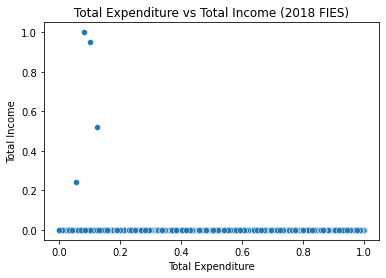

In [ ]:
sns.scatterplot(data=normalized_exp_inc18, x="Total Expenditure", y="Total Income")
plt.title("Total Expenditure vs Total Income (2018 FIES)")
plt.xlabel("Total Expenditure")
plt.ylabel("Total Income")

### FIES 2018 (1000 rows only)


Text(0, 0.5, 'Total Income')

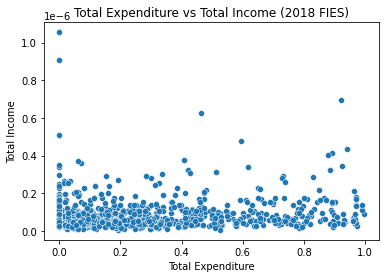

In [ ]:
sns.scatterplot(data=normalized_exp_inc18.head(1000), x="Total Expenditure", y="Total Income")
plt.title("Total Expenditure vs Total Income (2018 FIES)")
plt.xlabel("Total Expenditure")
plt.ylabel("Total Income")

### FIES 2021 - Total Expenditure vs Total Income

Text(0, 0.5, 'Total Income')

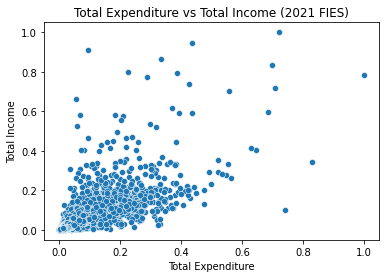

In [ ]:
sns.scatterplot(data=normalized_exp_inc21, x="Total Expenditure", y="Total Income")
plt.title("Total Expenditure vs Total Income (2021 FIES)")
plt.xlabel("Total Expenditure")
plt.ylabel("Total Income")

### FIES 2021 (1000 rows only)

Text(0, 0.5, 'Total Income')

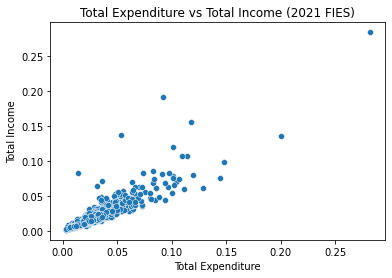

In [ ]:
sns.scatterplot(data=normalized_exp_inc21.head(1000), x="Total Expenditure", y="Total Income")
plt.title("Total Expenditure vs Total Income (2021 FIES)")
plt.xlabel("Total Expenditure")
plt.ylabel("Total Income")

## Line Plot - Total Expenditure vs Total Income (FIES 2018 and FIES 2021)

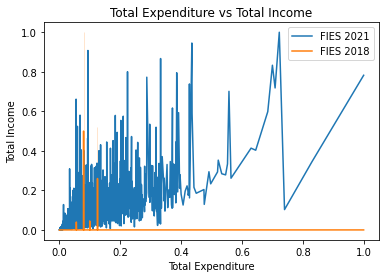

In [ ]:
sns.lineplot(x = "Total Expenditure", y = "Total Income", data=normalized_exp_inc21, label="FIES 2021")
sns.lineplot(x = "Total Expenditure", y = "Total Income", data=normalized_exp_inc18, label="FIES 2018")
plt.legend(loc="upper right")
plt.title("Total Expenditure vs Total Income")
plt.xlabel("Total Expenditure")
plt.ylabel("Total Income")
plt.show()

## Scatter Plot - Expenditures Selected via PCA

PCA with Explained Variance of 95%
> Top 1 Component = 'MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD'



In [ ]:
pca_exp_21 = df_21[['MEAT', 'FRUIT', 'HOUSING_WATER', 'COMMUNICATION', 'FISH', 
                    'MILK', 'SUGAR', 'RENTVAL', 'OIL', 'TRANSPORT', 'FURNISHING', 
                    'FRUIT_VEG', 'INSURANCE', 'CLOTH', 'BREAD']] 

In [ ]:
pca_exp_total_21 = pca_exp_21.sum(axis=1)
pca_exp_total_21 = pd.DataFrame(pca_exp_total_21)
pca_exp_total_21 = pca_exp_total_21.rename(columns={0:'total_exp'})
pca_exp_total_21["total_income"] = df_21["TOINC"]
pca_exp_total_21

,total_exp,total_income
0,313195,699940
1,236892,324810
2,185218,190061
3,130595,213705
4,153372,272290
...,...,...
165024,30427,46524
165025,113078,123280
165026,59693,143960
165027,91490,131950


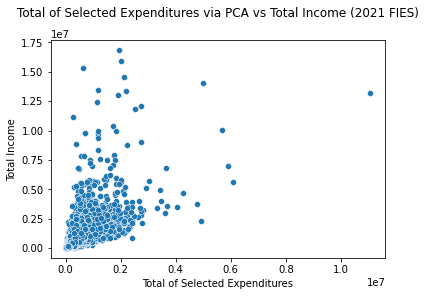

In [ ]:
sns.scatterplot(data=pca_exp_total_21, x="total_exp", y="total_income")
plt.title("Total of Selected Expenditures via PCA vs Total Income (2021 FIES)",y=1.08)
plt.xlabel("Total of Selected Expenditures")
plt.ylabel("Total Income")
plt.show()

## Scatter Plot - Expenditures Selected via RFI

In [ ]:
rfi_exp_21 = df_21[['HOUSING_WATER', 'COMMUNICATION', 'MEAT', 'MISCELLANEOUS',
                    'RENTVAL', 'INSURANCE', 'FRUIT', 'TRANSPORT', 'HEALTH', 'BREAD']]

In [ ]:
rfi_exp_total_21 = rfi_exp_21.sum(axis=1)
rfi_exp_total_21 = pd.DataFrame(rfi_exp_total_21)
rfi_exp_total_21 = rfi_exp_total_21.rename(columns={0:'total_exp'})
rfi_exp_total_21["total_income"] = df_21["TOINC"]
rfi_exp_total_21

,total_exp,total_income
0,278743,699940
1,219584,324810
2,174684,190061
3,122780,213705
4,140654,272290
...,...,...
165024,27253,46524
165025,89758,123280
165026,64710,143960
165027,74470,131950


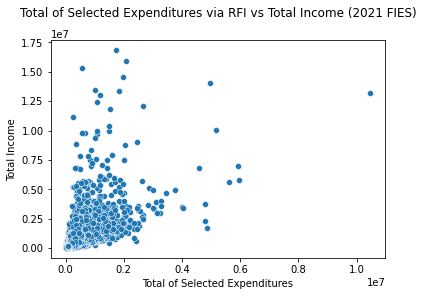

In [ ]:
sns.scatterplot(data=rfi_exp_total_21, x="total_exp", y="total_income")
plt.title("Total of Selected Expenditures via RFI vs Total Income (2021 FIES)",y=1.08)
plt.xlabel("Total of Selected Expenditures")
plt.ylabel("Total Income")
plt.show()